# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, использую timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
Визуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [2]:
N = 49 # put your index here

In [3]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [4]:
## Задание 1
import itertools
from sklearn.base import BaseEstimator, ClusterMixin

class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """
    
    def __init__(self, k=2, linkage="single", affinity="euclidean", **kwargs):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.k = k
        if (k < 1):
            self.k = 1
        self.linkage = linkage
        self.affinity = affinity
        return
        
    def fit(self, X, y=None):
        """
        Use data matrix X to compute model parameters
        """
        self.X_len = len(X)
        
        clusters_num = self.X_len
        clusters = np.array(xrange(self.X_len))
        
        dist = ss.distance.cdist(X, X, metric = self.affinity)
        dist[dist == 0] = np.ndarray.max(dist) + 1
        
        if (self.linkage == 'average'):
            def average_link(x, y, n, m):
                return (x * n + y * m) / (n + m)
        
            v_average_link = np.vectorize(average_link)
            
            while(clusters_num > self.k):
                # find closest clusters
                c_a, c_b = numpy.unravel_index(argmin(dist), dist.shape)

                c = c_a
                c_a = min(c, c_b)
                c_b = max(c, c_b)

                # calculate new distances
                ind = np.arange(dist.shape[0])
                ind1 = ind[(ind != c_a) & (ind != c_b)]
                len_c_a = len(clusters[clusters == c_a])
                len_c_b = len(clusters[clusters == c_b])
                val = v_average_link(dist[c_a,], dist[c_b,], len_c_a, len_c_b)[ind1]

                dist[c_a, ind1] = val
                dist[c_b, ind1] = val

                # merge clusters
                ind = np.arange(dist.shape[0])
                ind = ind[ind != c_b]
                dist = dist.take(ind, axis = 0).take(ind, axis = 1)

                # update labels
                clusters[clusters == c_b] = c_a
                clusters[clusters > c_b] -= 1
                clusters_num -= 1
            
        else:
            LINK = np.minimum
            if (self.linkage == "complete"):
                LINK = np.maximum
            while(clusters_num > self.k):
                # find closest clusters
                c_a, c_b = numpy.unravel_index(argmin(dist), dist.shape)

                c = c_a
                c_a = min(c, c_b)
                c_b = max(c, c_b)

                # calculate new distances
                ind = np.arange(dist.shape[0])
                ind1 = ind[(ind != c_a) & (ind != c_b)]
                val = LINK(dist[c_a,], dist[c_b,])[ind1]
                dist[c_a, ind1] = val
                dist[c_b, ind1] = val

                # merge clusters
                ind = np.arange(dist.shape[0])
                ind = ind[ind != c_b]
                dist = dist.take(ind, axis = 0).take(ind, axis = 1)

                # update labels
                clusters[clusters == c_b] = c_a
                clusters[clusters > c_b] -= 1
                clusters_num -= 1
                
        
        self.clusters = clusters
        return self
    
    def predict(self, X):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        return self.clusters
    
    def fit_predict(self, X, y=None):
        self.fit(X, y)
        return self.predict(X)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

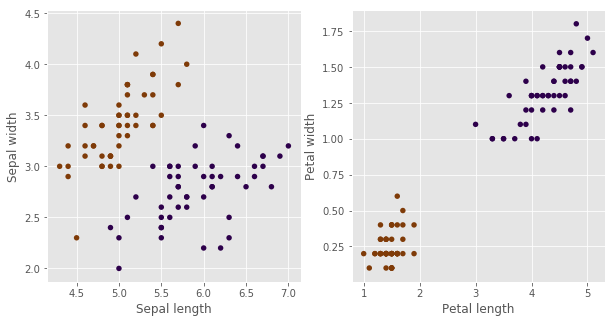

In [5]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

In [6]:
labels = Clustering(k = 2).fit(x_iris).clusters
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

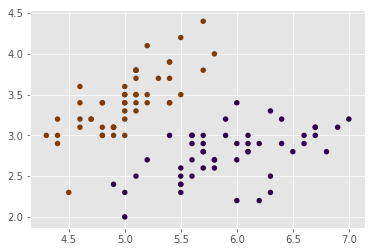

In [7]:
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=labels, cmap=pl.cm.PuOr, lw=0, s=30)

In [8]:
%timeit (Clustering().fit(x_iris).clusters)

100 loops, best of 3: 9.63 ms per loop


In [9]:
%timeit (sc.AgglomerativeClustering().fit_predict(x_iris))

The slowest run took 84.39 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 995 µs per loop


Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [10]:
pred_iris = Clustering().fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

Adjusted Rand index for iris is: 1.00


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [11]:
## Задание 2
# Cредний диаметр
def quality1(X, y):
    """
    Implement quality criterion of your choice
    """
    n = 0
    k = 0
    for i in range(0, len(X)):
        d = X[y == i]
        if (d.size == 0):
            continue
        k += 1
        n += np.ndarray.mean(ss.distance.pdist(X))
    return n / k 

In [12]:
# Инерция
def quality2(X, y):
    """
    Implement quality criterion of your choice
    """
    centroids = np.empty((len(X), X.shape[1]))
    for i in range(0, len(X)):
        d = X[y == i]
        if (d.size == 0):
            continue
        centroids[y == i] = np.average(d, axis = 0)
    n = numpy.ndarray.sum(np.power(ss.distance.cdist(X, centroids), 2))
    return n

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

In [13]:
ks = range(1, 21)
criteria1 = np.zeros(len(ks))
criteria2 = np.zeros(len(ks))

for i, k in enumerate(ks):
    cls = Clustering(k = k)
    y = cls.fit_predict(x_iris)
    criteria1[i] = quality1(x_iris, y)
    criteria2[i] = quality2(x_iris, y)

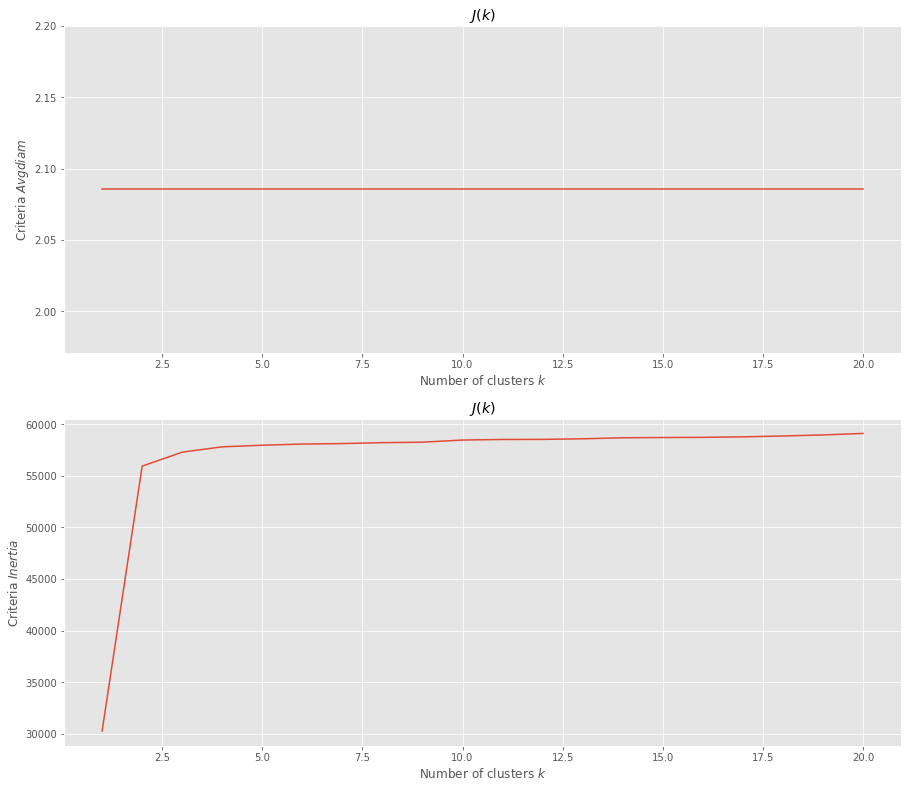

In [14]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(bottom = 0.5, top = 1.5)
plt.subplot(2, 1, 1)
pl.plot(ks, criteria1)
pl.title("$J(k)$")
pl.ylabel("Criteria $Avg diam$")
pl.xlabel("Number of clusters $k$")
pl.grid(True)

plt.subplot(2, 1, 2)
pl.plot(ks, criteria2)
pl.title("$J(k)$")
pl.ylabel("Criteria $Inertia$")
pl.xlabel("Number of clusters $k$")
pl.grid(True)

pl.show()

График зависимости инерции от числа кластеров явно показывает, что для данных данных число кластеров более 2 плохо описывают данные - величина инерции резко возросла.
График же зависимости среднего диаметра от числа кластеров показывает, что средний диаметр не является критерием качества.

In [15]:
## Задание 3
df = pd.read_csv('WDI_csv/WDIData.csv', sep=',')

In [16]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.831932,83.474617,84.006076,84.416148,84.734574,85.003645,85.244971,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.042248,84.655338,85.955345,86.392313,86.846966,87.604961,88.039125,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,72.292323,71.765345,73.734266,74.500717,75.218497,76.712250,77.407269,NaN,NaN,NaN


In [17]:
# fixate year = 2014
df = df[['Country Name', 'Indicator Code', '2014']]

In [18]:
# drop from df countries with strange values and records which can not be called countries
df = df[df['Country Name'] != 'Iran, Islamic Rep.']
df = df[df['Country Name'] != 'Vietnam']
df = df[df['Country Name'] != 'Iraq']
df = df[df['Country Name'] != 'Indonesia']
df = df[df['Country Name'] != 'Korea, Rep.']
df = df[df['Country Name'] != 'Japan']
df = df[df['Country Name'] != 'Colombia']

df = df[df['Country Name'] != 'World']

df = df[df['Country Name'] != 'Europe & Central Asia (excluding high income)']
df = df[df['Country Name'] != 'Europe & Central Asia']
df = df[df['Country Name'] != 'Europe & Central Asia (IDA & IBRD countries)']

df = df[df['Country Name'] != 'Heavily indebted poor countries (HIPC)']
df = df[df['Country Name'] != 'IDA only']
df = df[df['Country Name'] != 'IDA total']
df = df[df['Country Name'] != 'Least developed countries: UN classification']
df = df[df['Country Name'] != 'Pre-demographic dividend']
df = df[df['Country Name'] != 'Post-demographic dividend']
df = df[df['Country Name'] != 'Fragile and conflict affected situations']
df = df[df['Country Name'] != 'OECD members']

df = df[df['Country Name'] != 'High income']
df = df[df['Country Name'] != 'Upper middle income']
df = df[df['Country Name'] != 'Lower middle income']
df = df[df['Country Name'] != 'Low & middle income']
df = df[df['Country Name'] != 'Low income']

df = df[df['Country Name'] != 'Early-demographic dividend']

df = df[df['Country Name'] != 'East Asia & Pacific']
df = df[df['Country Name'] != 'East Asia & Pacific (IDA & IBRD countries)']
df = df[df['Country Name'] != 'East Asia & Pacific (excluding high income)']
df = df[df['Country Name'] != 'East Asia & Pacific (IDA & IBRD)']

df = df[df['Country Name'] != 'Europe & Central Asia (IDA & IBRD)']

df = df[df['Country Name'] != 'Euro area']
df = df[df['Country Name'] != 'European Union']

df = df[df['Country Name'] != 'Latin America & Caribbean (excluding high income)']
df = df[df['Country Name'] != 'Latin America & the Caribbean (IDA & IBRD countries)']
df = df[df['Country Name'] != 'Latin America & Caribbean (IDA & IBRD)']
df = df[df['Country Name'] != 'Latin America & Caribbean']
df = df[df['Country Name'] != 'Caribbean small states']

df = df[df['Country Name'] != 'IBRD only']
df = df[df['Country Name'] != 'IDA & IBRD total']
df = df[df['Country Name'] != 'IDA blend']
df = df[df['Country Name'] != 'Late-demographic dividend']

df = df[df['Country Name'] != 'Middle East & North Africa']
df = df[df['Country Name'] != 'Middle East & North Africa (IDA & IBRD countries)']
df = df[df['Country Name'] != 'Middle East & North Africa (IDA & IBRD)']
df = df[df['Country Name'] != 'Middle East & North Africa (excluding high income)']

df = df[df['Country Name'] != 'Middle income']
df = df[df['Country Name'] != 'Not classified']
df = df[df['Country Name'] != 'Other small states']
df = df[df['Country Name'] != 'Pacific island small states']
df = df[df['Country Name'] != 'Small states']

df = df[df['Country Name'] != 'South Asia']
df = df[df['Country Name'] != 'South Asia (IDA & IBRD)']

df = df[df['Country Name'] != 'Sub-Saharan Africa']
df = df[df['Country Name'] != 'Sub-Saharan Africa (IDA & IBRD countries)']
df = df[df['Country Name'] != 'Sub-Saharan Africa (IDA & IBRD)']
df = df[df['Country Name'] != 'Sub-Saharan Africa (excluding high income)']

df = df[df['Country Name'] != 'Central Europe and the Baltics']

df = df[df['Country Name'] != 'Arab World']
df = df[df['Country Name'] != 'North America']

In [19]:
d = df.pivot(index = 'Country Name', columns = 'Indicator Code', values = '2014')

In [20]:
d = d.dropna(axis = 1, how = 'all')
d = d.fillna(d.mean())

In [21]:
values = d.values

In [22]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(values)

In [23]:
labels = Clustering(k = 10, linkage = 'complete').fit(x_scaled).clusters

In [24]:
X_TSNE = sm.TSNE(random_state = 1234).fit_transform(x_scaled)

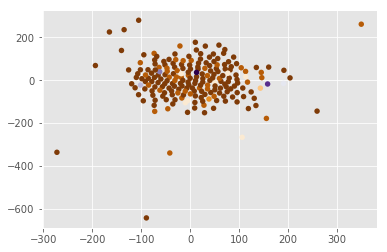

In [25]:
pl.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c=labels, cmap=pl.cm.PuOr, lw=0, s=30)
pl.show()

In [27]:
for i in range(0, 10):
    print d.index[labels == i]

Index([u'Afghanistan', u'Albania', u'Algeria', u'American Samoa', u'Andorra',
       u'Antigua and Barbuda', u'Armenia', u'Aruba', u'Australia', u'Austria',
       ...
       u'Tuvalu', u'Ukraine', u'United Arab Emirates', u'United Kingdom',
       u'Uruguay', u'Uzbekistan', u'Vanuatu', u'Virgin Islands (U.S.)',
       u'West Bank and Gaza', u'Yemen, Rep.'],
      dtype='object', name=u'Country Name', length=155)
Index([u'Angola', u'Bangladesh', u'Benin', u'Burkina Faso', u'Burundi',
       u'Cameroon', u'Central African Republic', u'Chad', u'Congo, Dem. Rep.',
       u'Congo, Rep.', u'Cote d'Ivoire', u'Djibouti', u'Eritrea', u'Ethiopia',
       u'Ghana', u'Guinea', u'Guinea-Bissau', u'Kenya', u'Liberia',
       u'Madagascar', u'Malawi', u'Mali', u'Mauritania', u'Mozambique',
       u'Nepal', u'Niger', u'Nigeria', u'Pakistan', u'Rwanda', u'Senegal',
       u'Sierra Leone', u'Somalia', u'South Sudan', u'Sudan',
       u'Syrian Arab Republic', u'Tajikistan', u'Togo', u'Uganda',
       u'

## Задание 4
Результаты кластеризации получились осмысленными при выборе в качестве параметра linkage = complete, n_clusters = 10. <br>
В отдельные кластеры выделились крупные страны - Россия, Китай, США, Индия, Мексика, Бразилия. <br>
В общий кластер попали более мелкие государства. Они разделились на два крупных кластера - в один попали в основном более бедные страны, в другой - менее медные.

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.